## Problema de Negocio

Para el calculo del coficiente intelectual (IQ) de una persona, se realizan multiples test. El cansancio y la concentración en los mismos es clave para obtener un coeficiente correcto. 

Nuestro departamento debe crear un modelo de regressión que permita estimar el IQ en base a solo 5 test (frente a los diez del sistema anterior). Para ellos disponemos de una muestra con los test de 30 personas

Se pide contruir modelos de regressión y mustrar su calidad de ajuste en una muestra de test del 20%

*****

Empezamos por importar los datos

In [1]:
import pandas as pd
import numpy as np
df_IQ = pd.read_excel('IQ_data.xlsx')

In [2]:
for i in list(df_IQ.columns):
    if 'Unnamed' in i:
        df.drop(i,inplace=True,axis=1)

In [3]:
df_IQ.head()

,IQ,Test 1,Test 2,Test 3,Test 4,Test 5
0,107,84,35,66,64,65
1,93,74,20,74,49,83
2,103,55,82,83,66,74
3,122,97,73,92,89,95
4,103,85,54,73,69,83


In [4]:
df_IQ.shape[0]

30

### Análisis Descriptivo y exploratorio

Para entender mejor las variables y sus relaciones, realicemos un análisis exploratorio

In [5]:
df_IQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   IQ      30 non-null     int64
 1   Test 1  30 non-null     int64
 2   Test 2  30 non-null     int64
 3   Test 3  30 non-null     int64
 4   Test 4  30 non-null     int64
 5   Test 5  30 non-null     int64
dtypes: int64(6)
memory usage: 1.5 KB


In [6]:
# correlation
import seaborn as sns
correlations = df_IQ.corr()

correlations

,IQ,Test 1,Test 2,Test 3,Test 4,Test 5
IQ,1.000000,0.508567,0.074087,-0.392851,0.508041,-0.233539
Test 1,0.508567,1.000000,0.090671,-0.240008,0.754264,0.028781
Test 2,0.074087,0.090671,1.000000,0.204556,0.617003,-0.053904
Test 3,-0.392851,-0.240008,0.204556,1.000000,-0.112302,0.358853
Test 4,0.508041,0.754264,0.617003,-0.112302,1.000000,-0.144210
Test 5,-0.233539,0.028781,-0.053904,0.358853,-0.144210,1.000000


<AxesSubplot:>

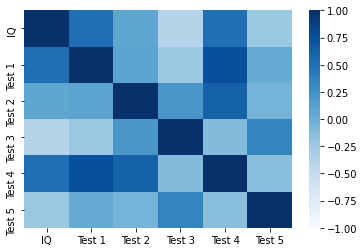

In [7]:
sns.heatmap(correlations, vmin=-1, vmax=1, cmap="Blues")

In [8]:
print(correlations.loc['Test 1','Test 4'])
print(correlations.loc['IQ','Test 1'])
print(correlations.loc['Test 2','Test 4'])

0.7542637455729184
0.5085667021566543
0.6170027797757694


**Nota**: Las variables Test1, test2 y test4 pueden presentar problemas de colinearidad

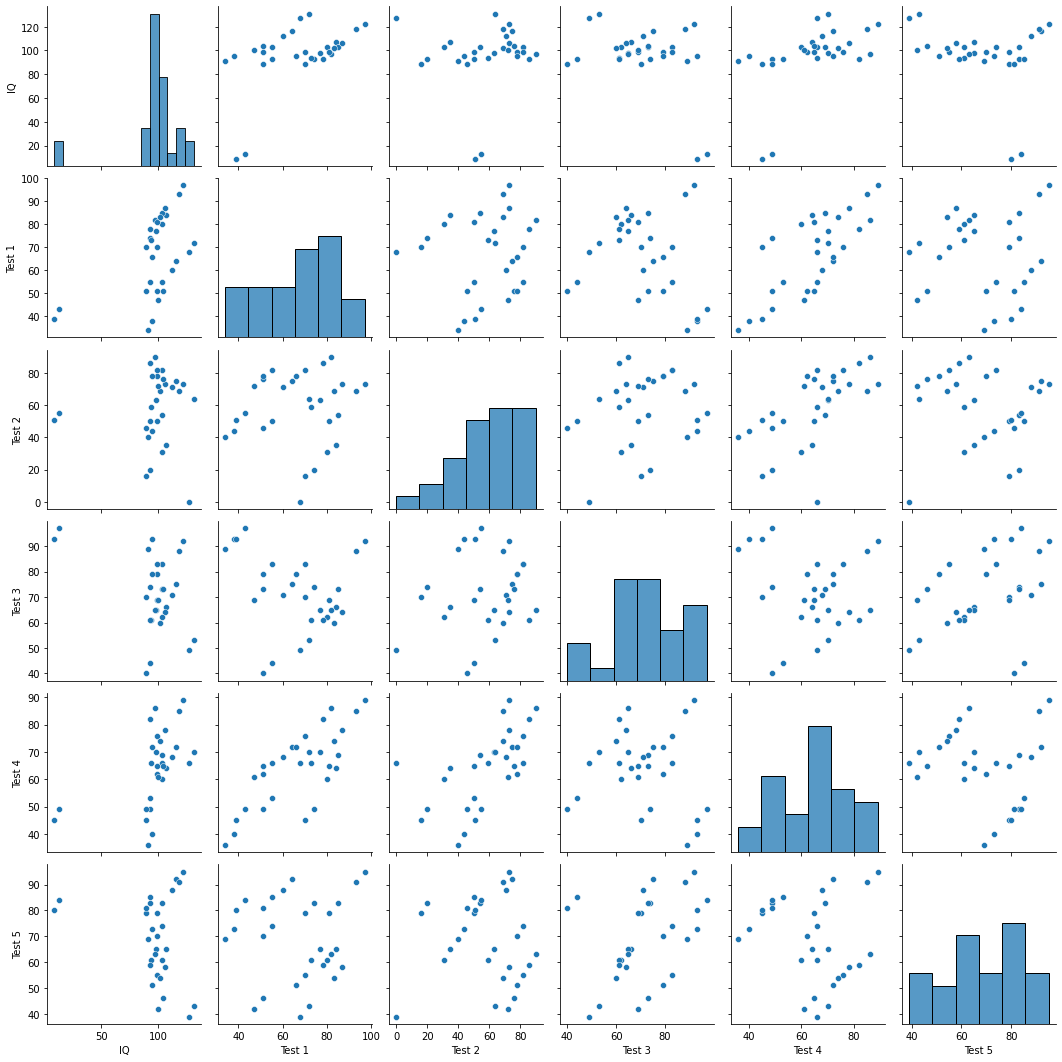

In [9]:
sns.pairplot(df_IQ)

CONCLUSIONES: 
 * La variable respuesta no presenta distribución Normal, de hecho es multimodal. Posiblemente debamos eliminar los outliers
 * algunas variables explicativas (Test_1 y Test_4) presentan alta correlación. Una de ellas no será necesaria
    
    

### Tratamiento de los Outliers

### Modelo de Regresión Lineal Múltiple

In [10]:
import statsmodels.api as sm 

Preparamos los datos:
 * Variables Independientes: *Test 1, Test 2, Test 3, Test 4, Test 5*
 * Variable Dependiente/Respuesta: IQ

Empecemos usando todas las variables

In [58]:
X = df_IQ[['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']]
Y = df_IQ['IQ']

In [59]:
X1 = sm.add_constant(X) # Se crea una columna de constantes (línea Intercept)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     3.420
Date:                Wed, 06 Apr 2022   Prob (F-statistic):             0.0179
Time:                        20:19:56   Log-Likelihood:                -131.36
No. Observations:                  30   AIC:                             274.7
Df Residuals:                      24   BIC:                             283.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.5185     33.275      2.270      0.033       6.843     144.194
Test 1        -0.0495      0.554     -0.089      0.930      -1.194       1.095
Test 2        -0.3442      0.355     -0.971      0.341      -1.076       0.388
Test 3        -0.4229      0.317     -1.334      0.195      -1.077       0.231
Test 4         1.2706      0.882      1.441      0.162      -0.549       3.090
Test 5        -0.1029      0.292     -0.353      0.727      -0.705       0.499
==============================================================================
Omnibus:                       13.240   Durbin-Watson:                   2.684
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.706
Skew:                          -1.235   Prob(JB):                      0.00106
Kurtosis:                       5.205   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretación del modelo

- La columna **"COEF"** determina la significación de cada variable. Si el guarismo es muy próximo a 0 esa variable no será representativa y podremos eliminarla, pues no aporta al modelo

- La columna P(t) nos muestra el PValor(la posibilidad de que una variable sea =0). Si es próximo a 1, será muy probable que dicha variable esté cercana a 0 y no aporte nada. Tenemos que fijarnos en aquellos que tengan un valor muy alto. El intervalo de confianza nos indica en qué valores, con un 95% de confianza, se moverá la variable basándonos en su coef y su std err.

**Bondad del ajuste**

- Existen varios criterios, desde los mas básicos (ECM o RECM) a R2 y R2 Ajustado, pasando por AIC y BIC. Para sacar los residuos con statsmodels, hacemos *reg.resid*. El problema de los R2 es que a más variables X mejor R2 cuando no tiene por qué ser así

- Siempre queremos el error mas pequeño. AIC y BIC son funciones del error, así que siempre nos quedaremos con el valor mas pequeño (incluso si fuera negativo).

### Calcular Error Cuadrático Medio (Root)

In [60]:
# Residuos

reg.resid.head() # Y-ypred

0     0.971354
1     5.607568
2    17.288817
3    12.013474
4     2.020654
dtype: float64

In [61]:
from statsmodels.tools.eval_measures import rmse

# fit your model which you have already done

# now generate predictions
ypred = reg.predict(X1)
rmse = rmse(Y, ypred)
rmse

19.2908707291574

In [62]:
# Formula
(np.sqrt((reg.resid**2).sum()/reg.resid.shape[0]))

19.2908707291574

In [63]:
ecm = (reg.resid**2).sum()/reg.resid.shape[0]
ecm

372.13769348906186

In [64]:
sorted(reg.resid**2)

[0.3308304667856461,
 0.3962732096420204,
 0.9435291505647304,
 2.6389300109841622,
 4.08304270499439,
 6.611947770070223,
 9.070550748128621,
 10.402785983653223,
 18.274276847088757,
 26.699991637885542,
 31.444820807944783,
 37.875394514531315,
 46.0170472513494,
 57.60641375577445,
 76.56480183810437,
 87.97350593241138,
 88.69197383157578,
 103.74892418565021,
 144.32356465925068,
 215.88378891803632,
 274.69342786797023,
 298.9031936581809,
 352.59512782375475,
 360.0204645836222,
 367.47780236474745,
 456.82005683983147,
 895.9951343256067,
 1058.136523246143,
 2921.2822970348852,
 3208.624382702685]

**Este primer modelo no es bueno. Todas las variables explicativas presentan p-values altos. Vamos a prescindir de la variable con peor p_value: Test_1**

In [18]:
X = df_IQ[[ 'Test 2', 'Test 3', 'Test 4', 'Test 5']]
Y = df_IQ['IQ']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4.450
Date:                Wed, 06 Apr 2022   Prob (F-statistic):            0.00748
Time:                        20:12:41   Log-Likelihood:                -131.36
No. Observations:                  30   AIC:                             272.7
Df Residuals:                      25   BIC:                             279.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.8549     32.398      2.341      0.027       9.130     142.580
Test 2        -0.3215      0.242     -1.330      0.195      -0.819       0.176
Test 3        -0.4196      0.309     -1.360      0.186      -1.055       0.216
Test 4         1.2000      0.382      3.141      0.004       0.413       1.987
Test 5        -0.1125      0.265     -0.424      0.675      -0.659       0.434
==============================================================================
Omnibus:                       12.831   Durbin-Watson:                   2.687
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.028
Skew:                          -1.211   Prob(JB):                      0.00148
Kurtosis:                       5.135   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**INTERPRETACIÓN: Al igual que antes, eliminamos la variable menos significativa: Test_5 ya que tiene un pvalor de 0.67**

In [19]:
X = df_IQ[[ 'Test 2', 'Test 3', 'Test 4']]
Y = df_IQ['IQ']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     6.064
Date:                Wed, 06 Apr 2022   Prob (F-statistic):            0.00285
Time:                        20:12:41   Log-Likelihood:                -131.47
No. Observations:                  30   AIC:                             270.9
Df Residuals:                      26   BIC:                             276.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.6055     29.463      2.396      0.024      10.043     131.167
Test 2        -0.3125      0.237     -1.319      0.199      -0.800       0.175
Test 3        -0.4662      0.284     -1.642      0.113      -1.050       0.117
Test 4         1.2044      0.376      3.205      0.004       0.432       1.977
==============================================================================
Omnibus:                       12.819   Durbin-Watson:                   2.808
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.123
Skew:                          -1.198   Prob(JB):                      0.00141
Kurtosis:                       5.181   Cond. No.                         887.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

INTERPRETACIÓN: Al igual que antes, eliminamos la variable menos significativa: Test_3

In [20]:
X = df_IQ[[ 'Test 3',  'Test 4']]
Y = df_IQ['IQ']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     8.007
Date:                Wed, 06 Apr 2022   Prob (F-statistic):            0.00186
Time:                        20:12:41   Log-Likelihood:                -132.44
No. Observations:                  30   AIC:                             270.9
Df Residuals:                      27   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.7088     28.378      2.915      0.007      24.482     140.936
Test 3        -0.5973      0.269     -2.216      0.035      -1.150      -0.044
Test 4         0.8783      0.287      3.062      0.005       0.290       1.467
==============================================================================
Omnibus:                       12.501   Durbin-Watson:                   2.800
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.039
Skew:                          -1.255   Prob(JB):                      0.00243
Kurtosis:                       4.824   Cond. No.                         715.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**INTERPRETACIÓN: Desde un punto de vista de teoría estadística, este modelo tiene todas sus variables significativas, ya que el pvalor es < que .1 e incluso del 5%**
    
Veamos si cumple las hipótesis de homocedasticidad, normalidad e independencia de residuos

<AxesSubplot:ylabel='Count'>

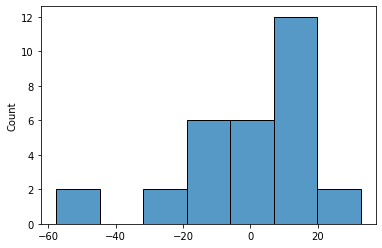

In [21]:
# DISTRIBUCIÓN DE LOS RESIDUOS
sns.histplot(reg.resid)

Los residuos no presentan una distribución normal

<AxesSubplot:xlabel='IQ'>

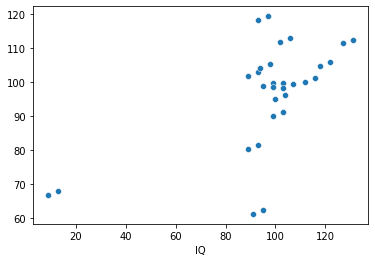

In [22]:
# AJUSTE ENTRE VALOR REAL Y PREDICHO DE LA VARIABLE RESPUESTA
sns.scatterplot(x=Y, y=reg.fittedvalues) # x es Y e y es ypred

<AxesSubplot:xlabel='IQ'>

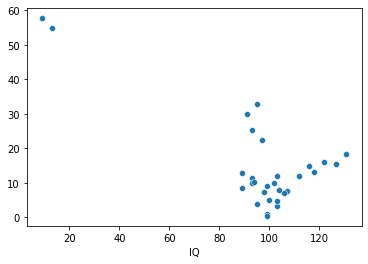

In [23]:
# RELACIÓN ENTRE RESIDUOS Y VARIABLE RESPUESTA
sns.scatterplot(x=Y, y=abs(reg.resid))

INTERPRETACIÓN: los valores extremos están afectando mucho al modelo. Realiemos el proceso sin esos valores

<AxesSubplot:xlabel='IQ', ylabel='Count'>

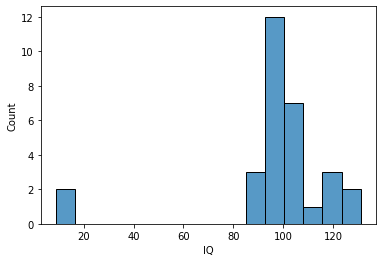

In [24]:
sns.histplot(df_IQ.IQ)

In [25]:
df_IQ.shape[0]

30

In [26]:
# ELIMINAMOS OUTLIERS
df_IQ1 = df_IQ.loc[ df_IQ['IQ']> 50 , :]

In [27]:
df_IQ1.shape[0]

28

<AxesSubplot:xlabel='IQ', ylabel='Count'>

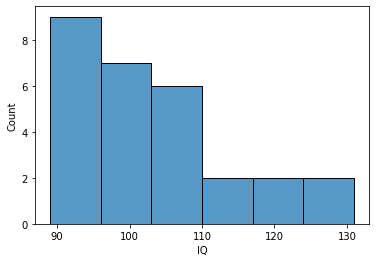

In [28]:
sns.histplot(df_IQ1.IQ)

In [29]:
# MODELO CON TODAS LAS VARIABLES, SALVO test_1 por estar muy correlada con test_4
X = df_IQ1[['Test 2', 'Test 3','Test 4', 'Test 5']]
Y = df_IQ1['IQ']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     3.730
Date:                Wed, 06 Apr 2022   Prob (F-statistic):             0.0176
Time:                        20:12:42   Log-Likelihood:                -99.859
No. Observations:                  28   AIC:                             209.7
Df Residuals:                      23   BIC:                             216.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.9949     14.527      4.749      0.000      38.943      99.047
Test 2        -0.2561      0.108     -2.366      0.027      -0.480      -0.032
Test 3         0.1139      0.148      0.770      0.449      -0.192       0.420
Test 4         0.6817      0.178      3.821      0.001       0.313       1.051
Test 5        -0.0564      0.119     -0.475      0.639      -0.302       0.189
==============================================================================
Omnibus:                        9.162   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                7.562
Skew:                           1.011   Prob(JB):                       0.0228
Kurtosis:                       4.546   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# MODELO sin test_1 ni test_5
X = df_IQ1[['Test 2', 'Test 3','Test 4']]
Y = df_IQ1['IQ']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     5.061
Date:                Wed, 06 Apr 2022   Prob (F-statistic):            0.00740
Time:                        20:12:42   Log-Likelihood:                -99.995
No. Observations:                  28   AIC:                             208.0
Df Residuals:                      24   BIC:                             213.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.3442     13.194      5.028      0.000      39.114      93.575
Test 2        -0.2514      0.106     -2.371      0.026      -0.470      -0.033
Test 3         0.0919      0.138      0.665      0.512      -0.193       0.377
Test 4         0.6829      0.175      3.891      0.001       0.321       1.045
==============================================================================
Omnibus:                       10.898   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.963
Skew:                           1.103   Prob(JB):                      0.00686
Kurtosis:                       4.918   Cond. No.                         858.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# MODELO sin test_1 , test_3, ni test_5
X = df_IQ1[['Test 2', 'Test 4']]
Y = df_IQ1['IQ']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     7.538
Date:                Wed, 06 Apr 2022   Prob (F-statistic):            0.00274
Time:                        20:12:42   Log-Likelihood:                -100.25
No. Observations:                  28   AIC:                             206.5
Df Residuals:                      25   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.7295      8.953      8.123      0.000      54.290      91.169
Test 2        -0.2303      0.100     -2.302      0.030      -0.436      -0.024
Test 4         0.6641      0.171      3.878      0.001       0.311       1.017
==============================================================================
Omnibus:                        6.621   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                4.730
Skew:                           0.861   Prob(JB):                       0.0940
Kurtosis:                       4.042   Cond. No.                         469.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

INTERPRETACIÓN: El modelo es válido a falta de revisar las hipótesis del modelo

<AxesSubplot:ylabel='Count'>

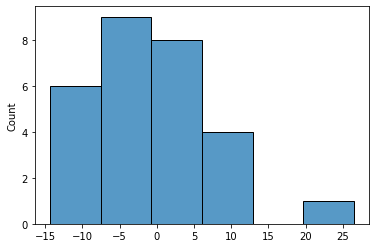

In [32]:
# DISTRIBUCIÓN DE LOS RESIDUOS
sns.histplot(reg.resid)

<AxesSubplot:xlabel='IQ'>

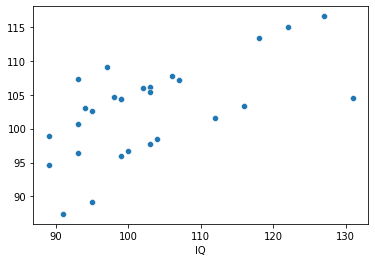

In [33]:
# AJUSTE ENTRE VALOR REAL Y PREDICHO DE LA VARIABLE RESPUESTA
sns.scatterplot(x=Y, y=reg.fittedvalues)

<AxesSubplot:xlabel='IQ'>

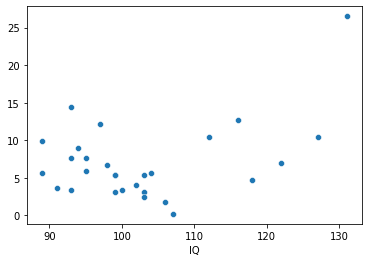

In [34]:
# RELACIÓN ENTRE RESIDUOS Y VARIABLE RESPUESTA
sns.scatterplot(x=Y, y=abs(reg.resid))

In [35]:
(abs(reg.resid)).mean() # Mean absolute error

7.041157790883661

## Métricas de Ajuste en test

Utilizamos el modelo anterior para estimar la precisión en una muestra de test

In [36]:
# PARTIMOS EN TRAIN TEST
from sklearn.model_selection import train_test_split

X = df_IQ1[['Test 2', 'Test 4']]
Y = df_IQ1['IQ']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [37]:
# ENTRENAMOS EL MODELO CON LA IBRERIA SKLEARN
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

In [38]:
# PREDICCIÓN
y_test_predict_lr = model_lr.predict(X_test)

In [39]:
# ERROR DE PREDICCIÓN EN TEST
from sklearn.metrics import mean_absolute_error

MAE_lr = mean_absolute_error(y_pred = y_test_predict_lr, y_true = y_test)

print("Linear Regression ------------------------")
print("MAE: ", MAE_lr)
print("Relative MAE (Linear Regression): ", 100*round(MAE_lr/y_test.mean(), 2), '%' )

Linear Regression ------------------------
MAE:  6.770663839626967
Relative MAE (Linear Regression):  6.0 %


## Utilicemos un modelo de tipo ensamble (Random Forest)


In [40]:

X = df_IQ1[['Test 1','Test 2','Test 3','Test 4', 'Test 5']]
Y = df_IQ1['IQ']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
model_rf = rf.fit(X_train, y_train)

y_test_predict_rf = model_rf.predict(X_test)

MAE_rf = mean_absolute_error(y_pred = y_test_predict_rf, y_true = y_test)

print(" ")
print("Random Forest Regression -----------------")
print("MAE: ", MAE_rf)
print("Relative MAE (Random Forest): ", 100*round(MAE_rf/y_test.mean(),2) )


 
Random Forest Regression -----------------
MAE:  5.678215909090906
Relative MAE (Random Forest):  5.0


## Utilicemos un modelo lineal con seleccion automática de variables mediante penalización


In [42]:

from sklearn.linear_model import LassoCV # Lasso con CrossValidation

lasso = LassoCV(cv=10, n_alphas=1000 ) # seleccionaremos más o menos cv (defecto 5) en función del num de datos. Igual con los alphas
lasso.fit(X_train, y_train)

LassoCV(cv=10, n_alphas=1000)

In [43]:
lasso.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 10,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 1000,
 'n_jobs': None,
 'normalize': False,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [44]:
# Penalización escogida por CV
print(lasso.alpha_)

1.8537255864703213


In [45]:
# parametros del modelo

In [46]:
lasso.intercept_

91.22098260660177

In [47]:
lasso.coef_

array([-0.33815487, -0.35066179, -0.        ,  0.93993982, -0.10889372])

In [48]:
y_test_predict_lasso = lasso.predict(X_test)

MAE_lasso = mean_absolute_error(y_pred = y_test_predict_lasso, y_true = y_test)

print(" ")
print("Lasso Regression -----------------")
print("MAE: ", MAE_lasso)
print("Relative MAE (lasso): ", 100*round(MAE_lasso/y_test.mean(),2) )

 
Lasso Regression -----------------
MAE:  7.977336193153306
Relative MAE (lasso):  7.000000000000001


**EJERCICIO**: CALCULAR EL MAE RELATIVO Y ABSOLUTO USANDO GRADIENT BOOSTING

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
# Debemos utilizar validación cruzada para determinar la penalización del modelo
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Set the parameters by cross-validation

gb = GradientBoostingRegressor()
tuned_parameters = [
    {'learning_rate':[0.01,1,0.1],
     'n_estimators':[1,2,3,4,5]}
]

gbr = GridSearchCV(gb,tuned_parameters)
gbr.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid=[{'learning_rate': [0.01, 1, 0.1],
                          'n_estimators': [1, 2, 3, 4, 5]}])

In [50]:
y_predict = gbr.predict(X_test)
MAE_gbr = mean_absolute_error(y_predict,y_test)
print(" ")
print("------------- GradientBoostingRegressor -----------------")
print("MAE: ", MAE_gbr)
print("Relative MAE (GBR): ", 100*round(MAE_gbr/y_test.mean(),2),'%' )

 
------------- GradientBoostingRegressor -----------------
MAE:  3.7916666666666665
Relative MAE (GBR):  3.0 %
